### Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### Importing Stations file

In [2]:
dir_ = '/tf/Team 6 - Project/Data'

In [3]:
stations = pd.read_csv(dir_+'/Merge_Station_SSD.csv')

### Function to correct country names

In [4]:
def correction(x):
    if x == 'Bolivia, Plurinational State of':
        return 'Bolivia'
    elif x == 'Brunei Darussalam':
        return 'Brunei'
    elif x == 'Congo, the Democratic Republic of the' or x == 'Republic of Congo':
        return 'Congo'
    elif x == "Côte d'Ivoire":
        return "Cote d'Ivoire"
    elif x == 'Falkland Islands (Malvinas)':
        return 'Falkland Island'
    elif x == 'French Southern and Antarctic Landas':
        return 'French Southern and Antarctic Lands'
    elif x == 'Iran, Islamic Republic of':
        return 'Iran'
    elif x == "Lao People's Democratic Republic":
        return 'Laos'
    elif x == 'Macedonia, the Former Yugoslav Republic of':
        return 'Macedonia'
    elif x == 'Moldova, Republic of':
        return 'Moldova'
    elif x == 'Réunion':
        return 'Reunion'
    elif x == 'Saint Martin (French part)' or x == 'Sint Maarten' or x == 'Sint Maarten (Dutch part)':
        return 'Saint Martin'
    elif x == 'Syrian Arab Republic':
        return 'Syria'
    elif x == 'Tanzania, United Republic of':
        return 'Tanzania'
    elif x =='Vanatu':
        return 'Vanuatu'
    elif x == 'Venezuela, Bolivarian Republic of':
        return 'Venezuela'
    else:
        return x

In [5]:
tqdm.pandas()
stations['COUNTRY'] = stations['COUNTRY'].progress_apply(lambda x: correction(x))

100%|██████████| 145393/145393 [00:00<00:00, 313963.09it/s]


### Split in train and test in each country

In [6]:
countries = list(stations['COUNTRY'].unique())
train = pd.DataFrame(columns = stations.columns)
test = pd.DataFrame(columns = stations.columns)
for country in countries:
    try:
        train_1, test_1 = train_test_split(stations[stations['COUNTRY'] == country],test_size = 0.2)
    except:
        train_1 = stations[stations['COUNTRY'] == country]
        test_1 = pd.DataFrame(columns = stations.columns)                           
    train = pd.concat([train,train_1])
    test = pd.concat([test, test_1])    

### Saving data

In [163]:
train.to_csv(dir_+'/station_train.csv',index = False)
test.to_csv(dir_+'/station_test.csv',index = False)

### Vizualisation

In [7]:
train['Type'] = np.ones(train.shape[0])
test['Type'] = np.zeros(test.shape[0])
data = pd.concat([train,test])
data.head()

,STATION,COUNTRY,NAME,ELEVATION,LATITUDE,LONGITUDE,1_SUNRISE,1_SUNSET,1_DAYLIGHT,2_SUNRISE,...,10_SUNRISE,10_SUNSET,10_DAYLIGHT,11_SUNRISE,11_SUNSET,11_DAYLIGHT,12_SUNRISE,12_SUNSET,12_DAYLIGHT,Type
57,WBAF0000058,Afghanistan,Markaz-e Hukumat-e Darweshan,712.9272,31.133333,64.200000,2.688156,13.065386,10.377230,2.417685,...,1.777124,13.190925,11.413801,2.174383,12.765762,10.591379,2.564684,12.727404,10.162720,1.0
4,WBAF0000005,Afghanistan,Arghestan,1260.9576,31.566667,66.483333,2.551029,12.898075,10.347045,2.274427,...,1.630590,13.032926,11.402336,2.035115,12.600448,10.565333,2.429392,12.558134,10.128743,1.0
37,WBAF0000038,Afghanistan,Jabal Saraj,1609.0392,35.116667,69.233333,2.497327,12.585701,10.088374,2.167213,...,1.496419,12.799362,11.302943,1.963641,12.304342,10.340702,2.392220,12.228348,9.836128,1.0
66,WBAF0000067,Afghanistan,Munai,967.1304,34.983333,71.266667,2.356715,12.455112,10.098397,2.028783,...,1.358862,12.665890,11.307028,1.823610,12.173263,10.349653,2.250866,12.098509,9.847642,1.0
30,WBAF0000031,Afghanistan,Ghazni,2209.8000,33.533333,68.416667,2.492545,12.699087,10.206542,2.186955,...,1.528448,12.876718,11.348269,1.966993,12.410291,10.443298,2.379830,12.349741,9.969911,1.0


In [8]:
data.shape

(145393, 43)

In [18]:
import geopandas
from shapely.geometry import Point

In [37]:
data['Coord'] = data.apply(lambda x:(x['LONGITUDE'],x['LATITUDE']),axis=1)
data['Coord'] = data['Coord'].apply(Point)

In [38]:
grd = geopandas.GeoDataFrame(data, geometry='Coord')

In [39]:
def train_test(x):
    if x == 'United States':
        return 1
    else:
        return 0

In [40]:
grd['random'] = grd['COUNTRY'].apply(lambda x : train_test(x))

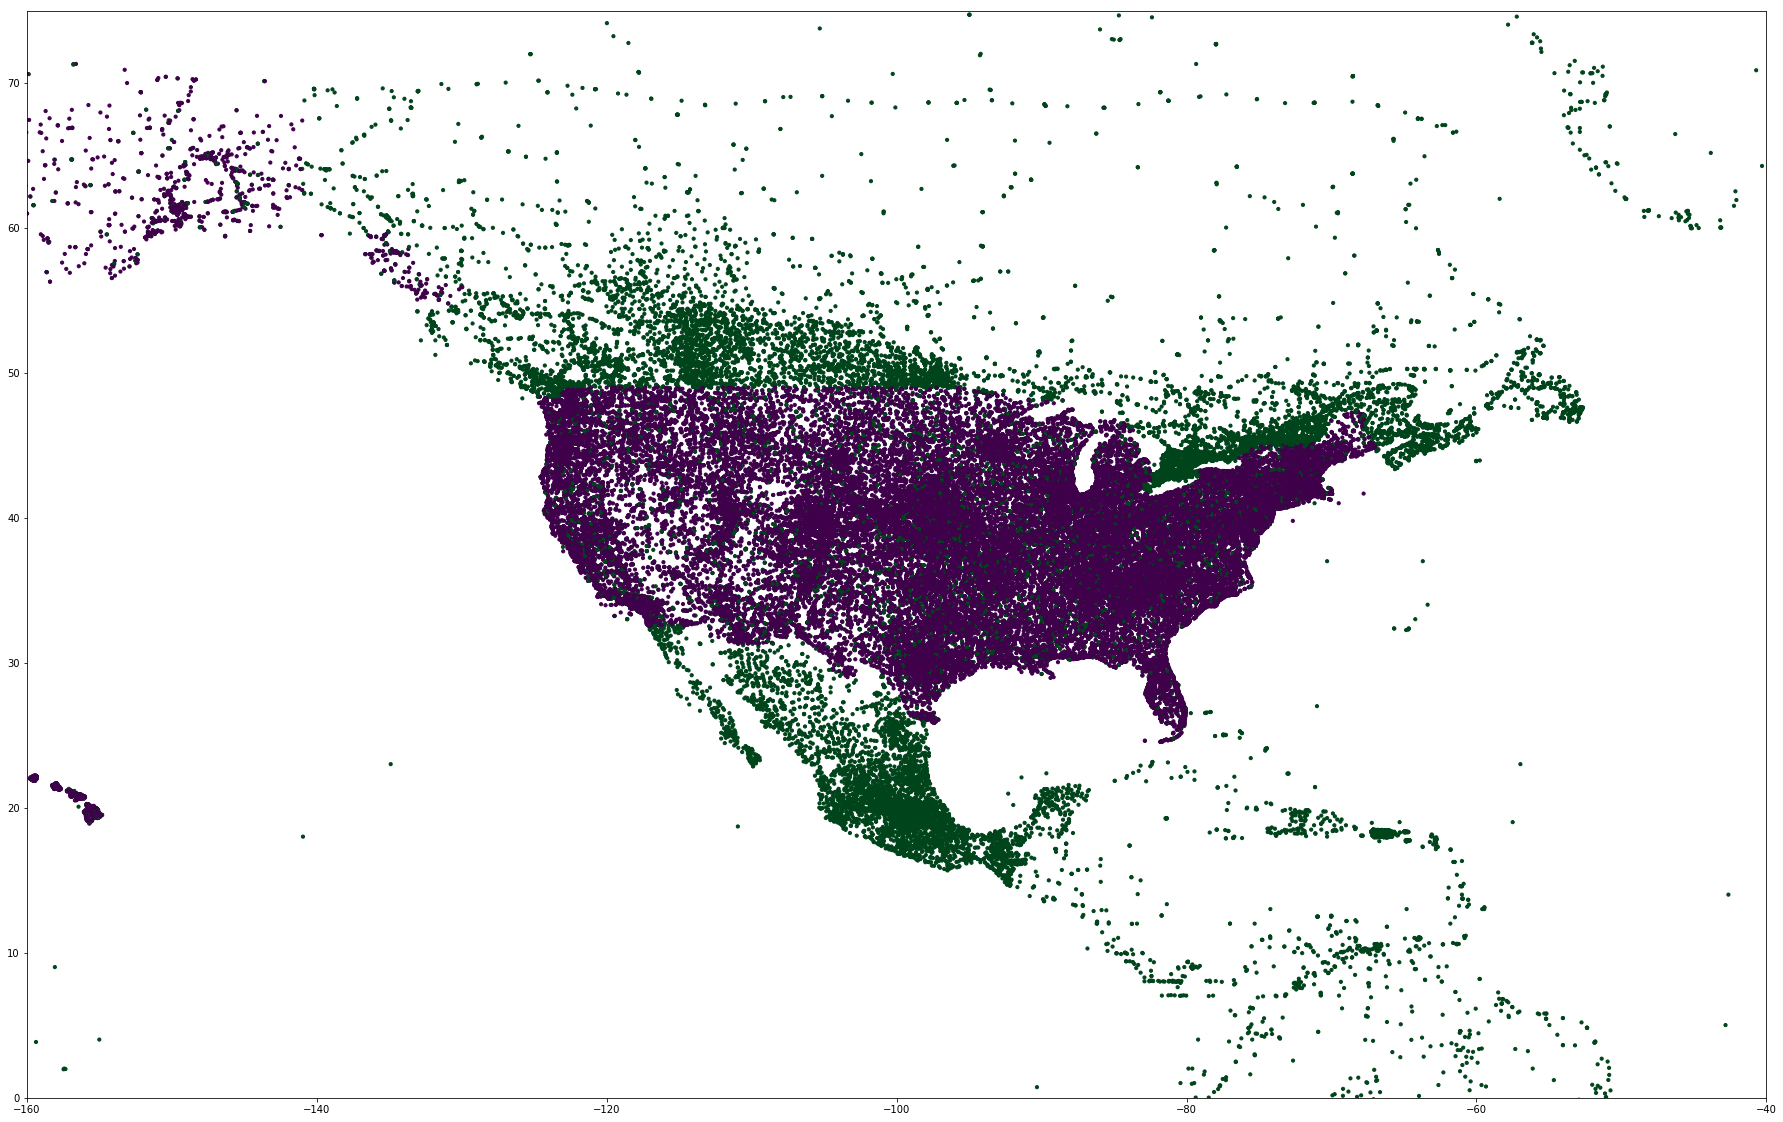

In [46]:
f = plt.figure(figsize=(40,20))
ax = f.add_subplot(111)
grd.plot('random',markersize = 10,cmap = 'PRGn_r',ax=ax)
plt.xlim(-160,-40)
plt.ylim(0,75)
plt.savefig('split_bad.jpg')
plt.show()

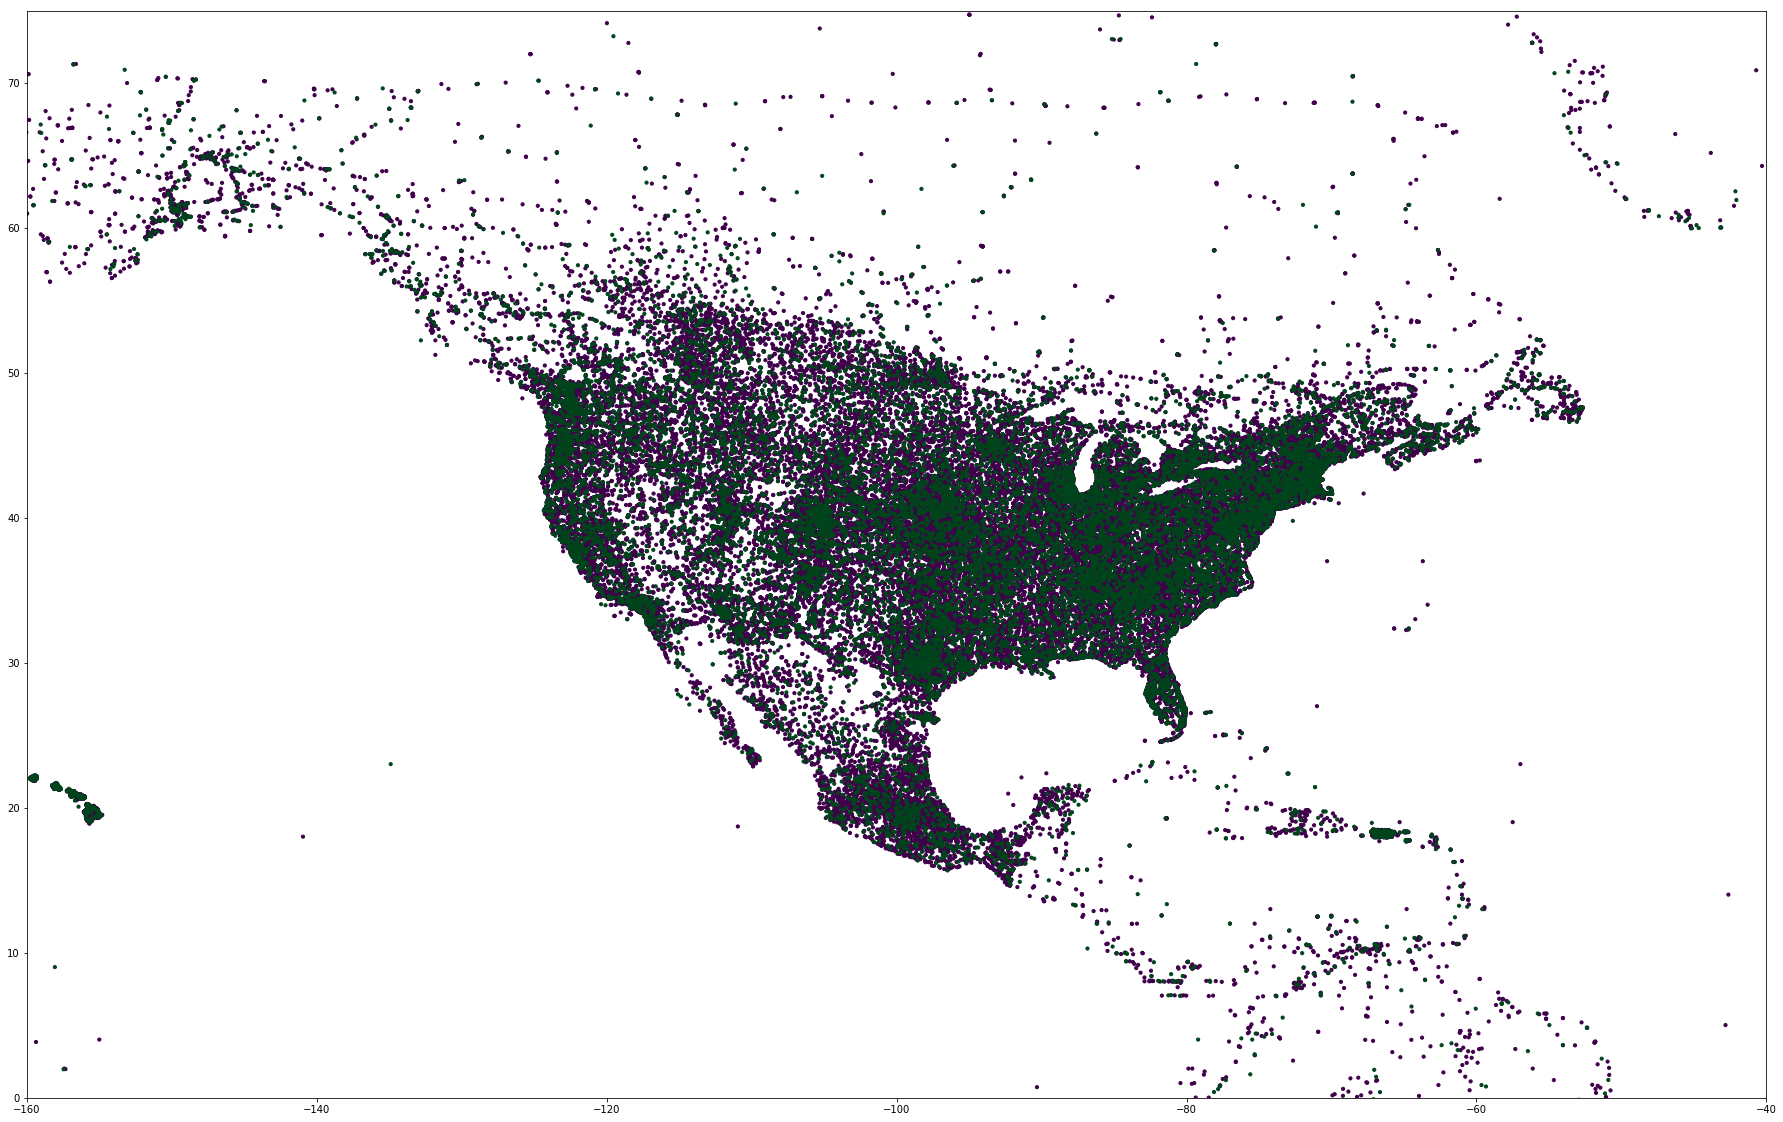

In [47]:
f = plt.figure(figsize=(40,20))
ax = f.add_subplot(111)
grd.plot('Type',markersize = 10,cmap = 'PRGn_r',ax=ax)
plt.xlim(-160,-40)
plt.ylim(0,75)
plt.savefig('split_good.jpg')
plt.show()